# Lab 6: Support Vector Machine (SVM)

## Goals of this lab
In this lab, you will:
- build a SVM classifier using scikit-learn
- visualize the decision boundary 
- get an intuition on how the decision boundary maximises the margin
- analyse the impact of regularization parameter C in the decision boundary

## Introduction

A [**Support Vector Machine (SVM)**](https://uk.mathworks.com/discovery/support-vector-machine.html) is a supervised learning algorithm used for many classification and regression problems, including signal processing  medical applications, natural language processing, and speech and image recognition.

The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates data points of one class from those of another class. “Best” is defined as the hyperplane with the largest margin between the two classes. Only for linearly separable problems can the algorithm find such a hyperplane.



---



## Problem Statement

In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the "SVC" function (Support Vector Classifier). 

First, we are going to import some libraries and functions that we will use:


*   `Numpy` library to work with arrays
*   `SVC` function from the SVM package in the Scikit-learn library, which is the one that implements SVM
*   `pyplot` package from Matplotlib, that will help us in plotting the results



In [ ]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [ ]:
# Create a meshgrid with values rangin from 0 to the maximum values of x and y
def make_meshgrid(x, y, h=.02):
    x_min, x_max = 0, x.max() + 1
    y_min, y_max = 0, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Plot the contours of a function clf within the values of xx and yy in the figure ax
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Plot a figure with the points (X,Y) and the classification function
def plot_figure(X, Y, clf, dataset):
  fig, ax = plt.subplots(figsize=(10, 7))
  # title for the plots
  title = ('Decision surface of SVC '+dataset)
  # Set-up grid for plotting.
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=50, edgecolors='face')
  ax.set_ylabel('x2')
  ax.set_xlabel('x1')
  ax.set_xticks(np.arange(0, X0.max() + 1, 10))
  ax.set_yticks(np.arange(0, X1.max() + 1, 10))
  ax.set_title(title)
  plt.show() 



---



## Training and Validation datasets

Support vectors refer to a subset of the training observations that define what should be the location of the separating hyperplane to classify positive and negative examples. Because we will be working with 2D data (we only use two features $x_1$ and $x_2$, our hyperplane is just a line in our case.

The standard SVM algorithm is formulated for binary classification problems, although modern libraries have built-in multi-class classification functionality. Otherwise, we should use one-vs.-all method. 

In our lab, we have a simple 2-dimensional dataset with two classes of observations. As usual, we have a training and a validation dataset:

*   Training data, where **XTrain** contains the feature values of the training examples and **yTrain** contains the ground truth of these examples. This dataset will be used to train the SVM models.
*   Validation data, where **XVal** contains the feature values of the validation samples and **yVal** contains the ground truth of these samples. This dataset will be used to verify how accurate the trained SVM models really are.



In [ ]:
# Parameters of training data
XTrain = np.array([[ 4, 43], [ 5, 12], [10, 31], [10, 20], [20, 37], [16, 10], [22, 18], [24,  4], [28,  9], [33, 19], [38,  5], [15, 47], [30, 32], [52,  6], [ 6, 60], \
                   [50,  8], [23, 58], [26, 50], [30, 40], [35, 28], [42, 61], [36, 50], [43, 37], [46, 45], [50, 22], [55, 35], [65, 25], [70, 46], [27, 37], [24, 23], [38, 19]])
# Ground truth of training data
yTrain = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Parameters of validation data
XVal = np.array([[3, 56], [4, 18], [6, 5], [10, 32], [16, 19], [18, 3], [33, 6], [28, 15], [28, 25], [24, 30], [25, 57], [50, 3], \
                  [20, 53], [28, 55], [35, 45], [38, 27], [37, 13], [40, 3], [57, 5], [53, 29], [50, 46], [64, 34], [65, 57], [31, 30]])
# Ground truth of validation data
yVal = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])



---



## Creating a SVM Classifier

**Support Vector Machines or Classifiers** fall under a class of machine learning algorithms called kernel methods where the features can be transformed using a kernel function. Kernel functions map the data to a different, often higher dimensional space with the expectation that the classes will be easier to separate after this transformation, potentially simplifying a complex non-linear decision boundaries to linear ones in the higher dimensional, mapped feature space. 

To start, we have an example of how to create a basic **Support Vector Classifier with a 'linear' kernel**, that is, a linear function that defines the margin between two classes of objects in the space, and the percentage of correct predictions this model predicts with the training data. This SVM or SVC is created with the "SVC" function provided by the Scikit-Learn library.

In [ ]:
# Create linear model
modelLinear = SVC(kernel='linear')
# Train the model using the data
clfLinear = modelLinear.fit(XTrain, yTrain)

# Check predictions for training data
res = modelLinear.predict(XTrain)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round((100/len(res)*(res==yTrain).sum()), 2))

% of correct predictions with training data
90.32


Sometimes a polynomial kernel, or function, works better for some distributions. The SVC function used allows us to define diferent kinds of functions, such as 'linear', as the previous example, or 'poly'.

Define a new SVM model with a polynomial function of degrees 3 and 10, and compare the results with the linear ones. **Which one is better?**

In [ ]:
#TO DO: Define a new SVM model with a polynomial function of degrees 3 and 10 and calculate % of correct predictions for the training data
# polynomial function of degrees 3
modelPoly3 = SVC(kernel='poly', degree = 3) #__________TO DO__________
clfPoly3 = modelPoly3.fit(XTrain, yTrain)#__________TO DO__________
# Check predictions for training data
res1 = modelPoly3.predict(XTrain)#__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data for polynomial of degree 3")
print(100/len(res1)*(res1==yTrain).sum()) # TO DO: Round the results to 2 decimals

# polynomial function of degrees 10
modelPoly10 = SVC(kernel='poly', degree = 10)#__________TO DO__________
clfPoly10 = modelPoly10.fit(XTrain, yTrain)#__________TO DO__________
# Check predictions for training data
res2 =  modelPoly10.predict(XTrain)#__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data for polynomial of degree 10")
print(100/len(res2)*(res2==yTrain).sum()) # TO DO: Round the results to 2 decimals

% of correct predictions with training data for polynomial of degree 3
87.09677419354838
% of correct predictions with training data for polynomial of degree 10
96.77419354838709


Now we have some models created and we know the % of correct predictions of the training data. 

**Which is the % of correct predictions for the validation data? Having these results in mind, which would be the best model for these distribution? Is it the same one as before? In case it isn't, why not?**



$\color{red}{\text{The % of correct predictions for the the validation data is 83.33% for linear model, 75% for polynomial of degree 3, and 75% for polynomial of degree 10}\\ 
\text{The best model in this case remains the same, i.e  the linear model.}}$

$\color{red}{\text{}}$

In [ ]:
# TO DO: Calculate % of correct predictions for the validation data

res = modelLinear.predict(XVal)
print("% of correct predictions with validation data for linear model")
print(round(100/len(res)*(res==yVal).sum(),2)) # TO DO: Round the results to 2 decimals#__________TO DO__________


res3 = modelPoly3.predict(XVal)
print("% of correct predictions with validation data for polynomial of degree 3")
print(100/len(res3)*(res3==yVal).sum()) # TO DO: Round the results to 2 decimals#__________TO DO__________

res4 = modelPoly10.predict(XVal)
print("% of correct predictions with validation data for polynomial of degree 10")
print(100/len(res4)*(res4==yVal).sum()) # TO DO: Round the results to 2 decimals#__________TO DO__________

% of correct predictions with validation data for linear model
83.33
% of correct predictions with validation data for polynomial of degree 3
75.0
% of correct predictions with validation data for polynomial of degree 10
75.0




---



## Plotting the results 

Most times analizing these results can be complicated. In this case, as we have 2D data, we can plot the results to further analize them, but bear in mind that, in most cases, we usually have more than 3 dimensions, preventing us from being able to plot this models. 

Here, we are plotting the different models we created *(linear and polynomials of degrees 3 and 10)* with the training and validation data.

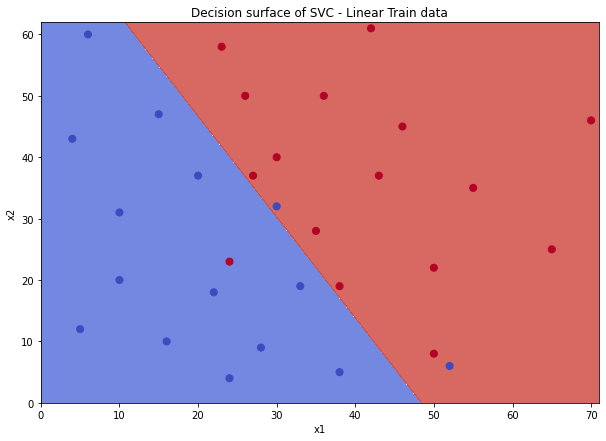

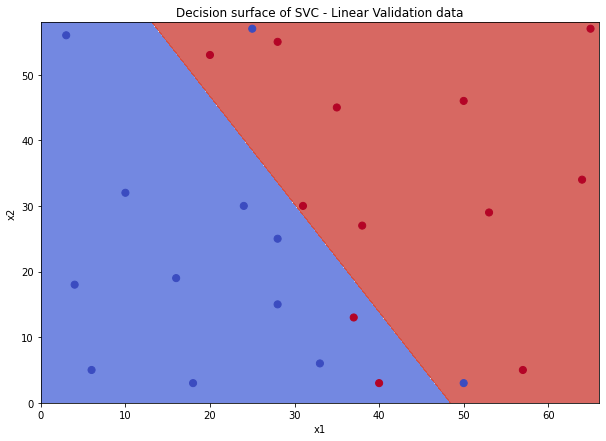

In [ ]:
# Plot the resulting linear model with the training and validation datasets
plot_figure(XTrain, yTrain, clfLinear, '- Linear Train data')
plot_figure(XVal, yVal, clfLinear, '- Linear Validation data')

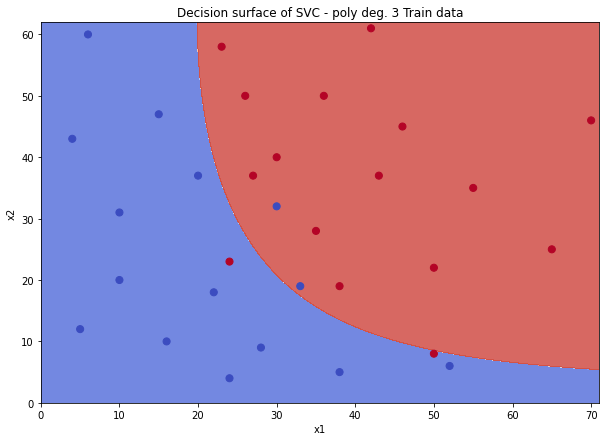

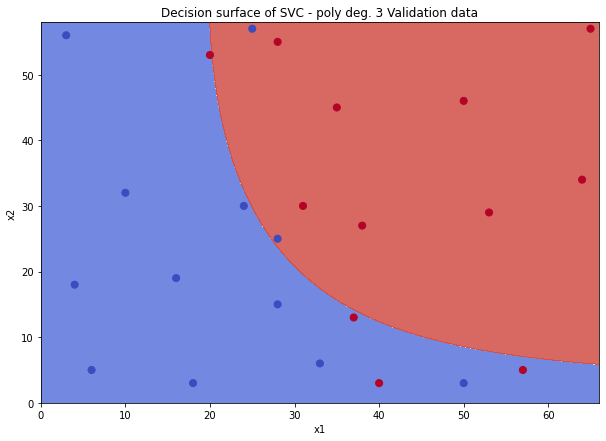

In [ ]:
#Plot the resulting polynomial model of degree 3 with the training and validation datasets
plot_figure(XTrain, yTrain, clfPoly3, '- poly deg. 3 Train data')
plot_figure(XVal, yVal, clfPoly3, '- poly deg. 3 Validation data')

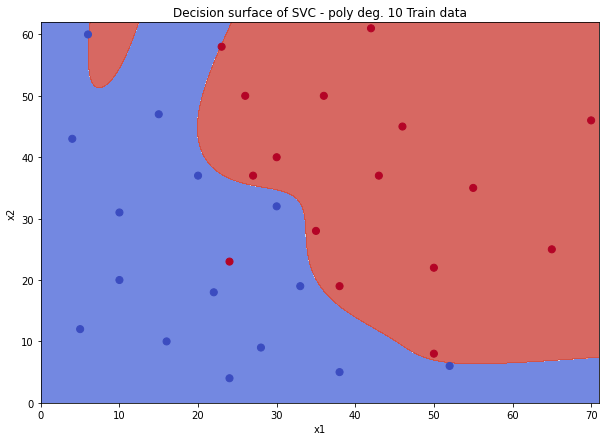

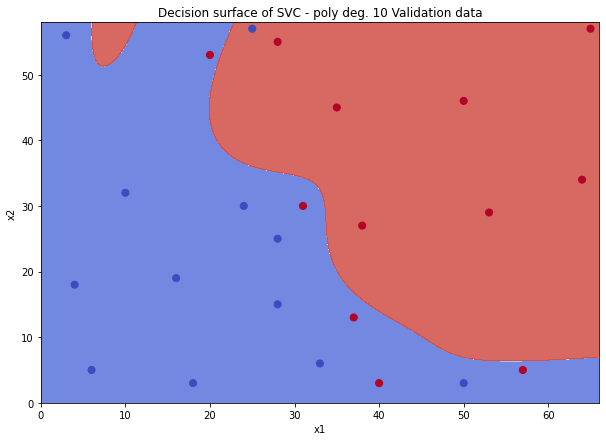

In [ ]:
# #Plot the resulting polynomial model of degree 10 with the training and validation datasets
plot_figure(XTrain, yTrain, clfPoly10, '- poly deg. 10 Train data')
plot_figure(XVal, yVal, clfPoly10, '- poly deg. 10 Validation data')

## Regularization parameter C 

The SVC function allows us to define the value of the regularization parameter C. Check how to define it, try diferent values $(10^{-5},10^{-2},1,10,10^3...)$ of C on the polynomial functions defined previously and compare the results. 

**What is the effect of this parameter on the function?**

$\color{red}{\text{The C parameter compromises between correctly classifying training samples and maximizing the margin of the decision function. For larger values of C, smaller margin}\\ \text{For larger values of C, if the decision function performs better at accurately classifying all of the points, a lower margin will be accepted. While simpler decision} \\\text{ function will result from a lower C, but at the expense of training accuracy, increasing the margin.}}$

% of correct predictions with training data for polynomial of degree 3
74.19354838709677


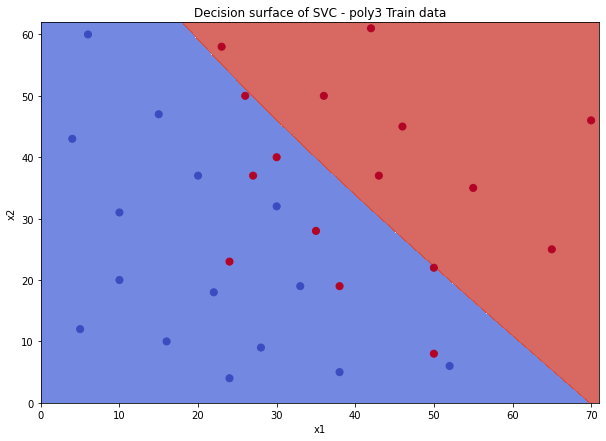

% of correct predictions with validation data for polynomial of degree 3
70.83333333333334


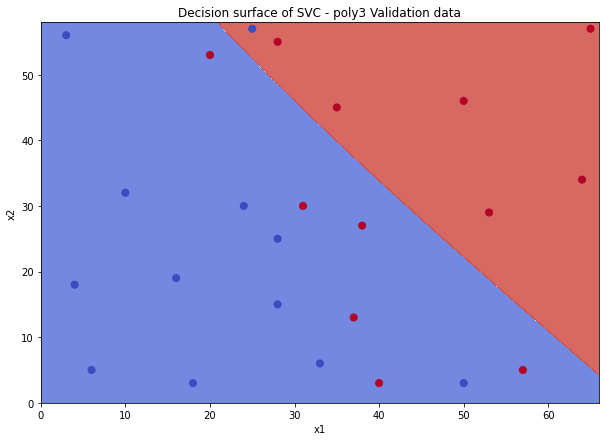

% of correct predictions with training data for polynomial of degree 10
96.77419354838709


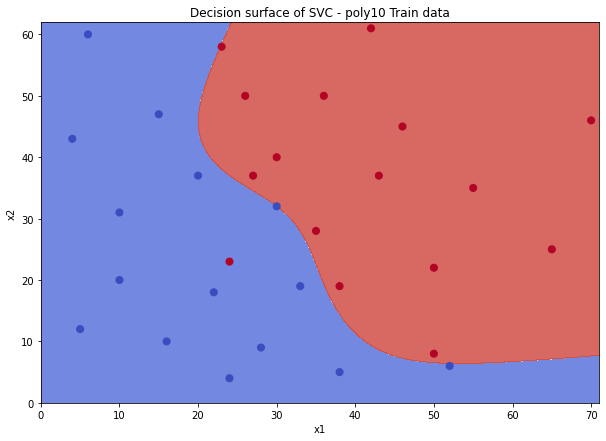

% of correct predictions with validation data for polynomial of degree 10
75.0


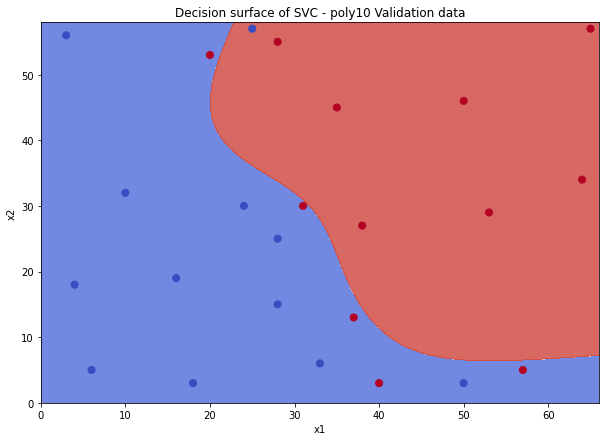

In [ ]:
#TO DO: Define a new SVM model with a polynomial function of degrees 3 and 10, define the C value and calculate % of correct predictions for the training and validation data
# polynomial function

# FOR POLYNOMIAL OF DEGREE 3
modelPoly = SVC(C= 0.001, kernel='poly', degree = 3)#__________TO DO__________
clfPoly = modelPoly.fit(XTrain, yTrain)#__________TO DO________
# TO DO: Check predictions for training data
#__________TO DO________
res5 = modelPoly.predict(XTrain)
print("% of correct predictions with training data for polynomial of degree 3")
print(100/len(res5)*(res5==yTrain).sum())
plot_figure(XTrain, yTrain, clfPoly, '- poly3 Train data')


# TO DO: Check predictions for validation data
#__________TO DO________
res6 = modelPoly.predict(XVal)
print("% of correct predictions with validation data for polynomial of degree 3")
print(100/len(res6)*(res6==yVal).sum())
plot_figure(XVal, yVal, clfPoly, '- poly3 Validation data')



# FOR POLYNOMIAL OF DEGREE 10

model_Poly10 = SVC(C= 0.001, kernel='poly', degree = 10)#__________TO DO__________
clfPoly_10 = model_Poly10.fit(XTrain, yTrain)
# TO DO: Check predictions for training data
#__________TO DO________
res7 = model_Poly10.predict(XTrain)
print("% of correct predictions with training data for polynomial of degree 10")
print(100/len(res7)*(res7==yTrain).sum())
plot_figure(XTrain, yTrain, clfPoly_10, '- poly10 Train data')


# TO DO: Check predictions for validation data
#__________TO DO________
res8 = model_Poly10.predict(XVal)
print("% of correct predictions with validation data for polynomial of degree 10")
print(100/len(res8)*(res8==yVal).sum())
plot_figure(XVal, yVal, clfPoly_10, '- poly10 Validation data')

## The gamma $(\gamma)$ parameter

Another parameter that can be modified is the $\gamma$ parameter. Define a new model with a 'rbf' kernel and try different values of C and $\gamma$ together. **What does 'rbf' stand for?** **How does it work?** **What is the effect of the gamma parameter $(\gamma)$ over the function?**

$\color{red}{\text{RBF stands for radial basis function}\\ \text{RBF kernels place a radial basis function centered at each point, then perform linear manipulations to map points to higher-dimensional}\\ \text{spaces that are easier to separate.}}$


$\color{red}{\text{The behaviour of the model is very sensitive to gamma. When gamma is very small, the model is too constrained and cannot capture the complexity of the data. i.e, } \\ \text{ a small gamma gives more weight to the regularization parameter C.}\\ \text{If gamma is large, the effect of the regularization parameter C becomes negligible}}$

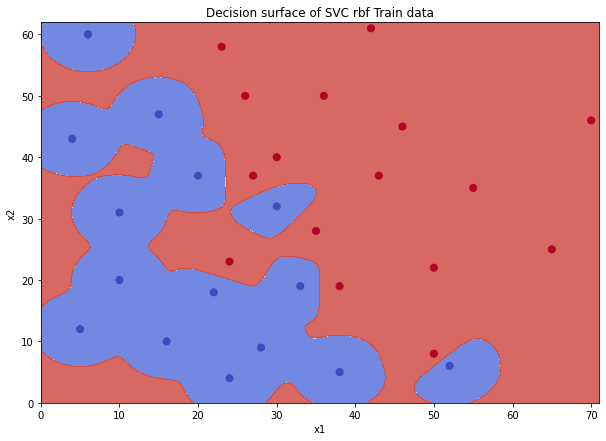

% of correct predictions with data for rbf Training 
100.0


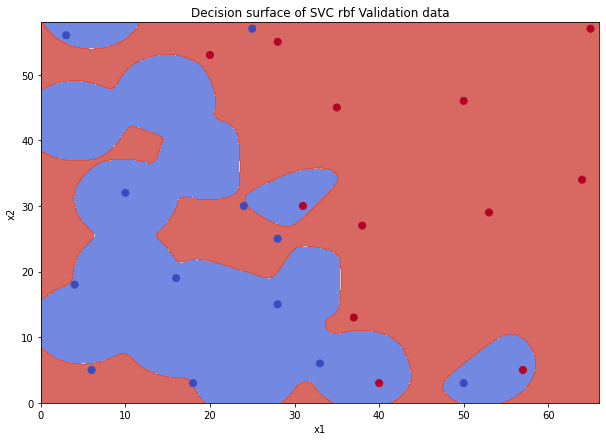

% of correct predictions with data for rbf Validation
70.83333333333334


In [ ]:
# TO DO: Define a new model with a 'rbf' kernel and try different values of C and gamma together, 
# and calculate the percentage of correct predictions for the training and validation data

# Create rbf model
modelrbf2 = SVC(C= 10, kernel='rbf', gamma = 0.1)#__________TO DO__________
# Train the model using the data
clfrbf2 = modelrbf2.fit(XTrain, yTrain)#__________TO DO__________

# TO DO: Check predictions for training data
#__________TO DO________
res_rbfTrain = modelrbf2.predict(XTrain)
plot_figure(XTrain, yTrain, clfrbf2, 'rbf Train data')
print("% of correct predictions with data for rbf Training ")
print(100/len(res_rbfTrain)*(res_rbfTrain==yTrain).sum())


# TO DO: Check predictions for validation data
#__________TO DO________
res_rbfVal = modelrbf2.predict(XVal)
plot_figure(XVal, yVal, clfrbf2, 'rbf Validation data')
print("% of correct predictions with data for rbf Validation")
print(100/len(res_rbfVal)*(res_rbfVal==yVal).sum())
